# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US.

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ].

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents.


### 1. Determine if and why ML is an appropriate solution to deploy.

Flight delays may affect the plans of the passengers as well as the efficiency of operating the airlines. If such delays are predicted to be more than fifteen minutes, it will allow passengers to alter their schedules and airlines an opportunity to improve quality of service. The objective is to develop a model that predicts the probability of flight delays within a reasonable window of time so that customer satisfaction is optimized with minimum disruption.

We develop a machine learning model which predicts flight delays to assist customers and the airline operators in planning and time management. It is a business objective with minimum accuracy of 85% but also considering precision and recall to minimize false negatives or, in other words, missed delays.

Machine learning is a solution for this problem.
Predictive Complexity: We are talking about time of day, weather, airline policies, traffic in the airports, as well as past performance, so there are a lot of variables involved in flight delay forecasting. Indeed, many complexities exist in inferring patterns between these various variables, and there are quite a few situations where nonlinear or ambiguous relationships may be found. Still, machine learning algorithms tend to do this quite well with large datasets.

Historical Data: Considering that factors pertaining to flight schedule, delays, etc. (including departure time, distance, and carriers) are factors relating to this problem, supervised learning is aptly applied. In this context, ML will serve a good predictive tool since it can make use of historical data to predict future events like delays.

### 2. Formulate the business problem, success metrics, and desired ML output.

Flight delays may affect the plans of the passengers as well as the efficiency of operating the airlines. If such delays are predicted to be more than fifteen minutes, it will allow passengers to alter their schedules and airlines an opportunity to improve quality of service. The objective is to develop a model that predicts the probability of flight delays within a reasonable window of time so that customer satisfaction is optimized with minimum disruption.

Success Metrics: The following metrics should be used to assess how well this solution succeeds:

Model Accuracy:of all instances (both delayed and nondelayed flights) that are correctly classified. An accuracy rate of at least 85% should be achieved.

Accuracy(Class of Delay):of actual delays that were predicted. High precision minimizes false positives - planes that are supposedly delayed but not.

AUC-ROC, or area under the ROC curve:Because the AUC is closer to 1, this metric captures the ability of the model to classify delayed and non-delayed flights at different thresholds.

Business Impact:fewer delays increase airlines' bottom line by saving costs
greater customer satisfaction due to fewer unexpected flight delays
better management of resources: allocating labor or aircraft ahead of delays.

### 3. Identify the type of ML problem you’re dealing with.

Learning Under Supervision:

In this problem, we are dealing with flight history labelled data. For each instance of a flight, one can see that a corresponding label has been assigned to the instance, either as 1 or 0, to denote whether the actual flight was delayed over 15 minutes or not. With the input features being, among others, a set of departure time, originating airport, and airline, a model learns to predict this outcome.
Binary Classification:

For the target variable of delay status there are two possible values:
0 (not delayed) 1 (more than 15 minutes delayed)
The problem is a binary classification because the model will predict every flight to one among these two classes.

Characterstics:
Some of these features include the date of flight, departure time, airline, origin, and destination, which fall under both numerical and category data.
Delayed or not delayed binary label output.
This is often a type of problem encountered with classification assignments aimed at predicting one of two outcomes from historical data.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [ ]:
import os
# Instead of from pathlib2 import Path, use:
from pathlib import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features?

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

1. There are many feature that needs to be deduce from the dataset-
The most important thing is removing missing values from the dataset it create inaccurate
Ranges and Scales: Simple statistics such as the mean, minimum, and maximum attribute values for Distance, CRSDepTime, and so on display the ranges of the data as well as the possible outliers.
Outliers: Large standard deviation values may indicate that some attributes have outliers.
Skewness: Features that are heavily skewed (such as where the mean would be far away from the median and hence normalization/Scaler may be necessary.

2. Imbalance of class -This may affect the capacity of the model to predict the minority class if one class among them, whether delayed or not, is dominantly represented in the sample. In this case, resampling, for instance, over-sampling the minority class or under-sampling the majority class, may become necessary, or it might be more suitable to use measures like the F1 score and AUC instead of accuracy.

3. Missing Values: It may be used to find columns that need to be dropped or filled in by searching for any missing values throughout the dataset.
The code print(df.isnull().sum())
Correlations: A correlation matrix could be calculated useful to understand relationships between many numerical parameters and the target. Features with high connection can be redundant and might be removed
Knowing the distribution and unique values of the variables in categories will help with learning how to encode categorical variables, for example which airlines, airports or departure times are most often occurring

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [ ]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = '/Users/sebastianjoseph/Desktop/DTS/OneDrive_1_17-10-2024.zip'
base_path = '/Users/sebastianjoseph/Desktop/DTS/OneDrive_1_17-10-2024.zip'
extraction_base_path = '/Users/sebastianjoseph/Desktop/DTS/Extracted/Onedrive_extracted'


!mkdir -p {csv_base_path}

#### Extract CSV files from ZIP files

In [ ]:
import os
import zipfile

# Paths
main_zip_path = '/Users/sebastianjoseph/Desktop/DTS/OneDrive_1_17-10-2024.zip'  # main zip path
extraction_base_path = '/Users/sebastianjoseph/Desktop/DTS/Extracted/Onedrive_extracted'  # desired extraction path

# Ensure extraction directory exists
os.makedirs(extraction_base_path, exist_ok=True)

# Helper function to extract CSV files from a nested ZIP file
def extract_csv_from_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as z:
        for file_name in z.namelist():
            if file_name.endswith('.csv'):
                z.extract(file_name, extract_to)
                print(f"Extracted: {file_name}")

# Extracting CSV files from main ZIP and nested ZIPs
with zipfile.ZipFile(main_zip_path, 'r') as main_zip:
    for file_name in main_zip.namelist():
        # Check if the file in the main zip is another zip file and not Mac metadata
        if file_name.endswith('.zip') and not file_name.startswith('__MACOSX/'):
            # Extract nested ZIP to a temporary path
            nested_zip_path = os.path.join(extraction_base_path, file_name)
            main_zip.extract(file_name, extraction_base_path)

            # Extract CSVs from nested ZIP
            extract_csv_from_zip(nested_zip_path, extraction_base_path)

            # Optionally, remove the nested zip file after extraction
            os.remove(nested_zip_path)
        elif file_name.endswith('.csv'):
            # Extract any CSV files directly in the main ZIP
            main_zip.extract(file_name, extraction_base_path)
            print(f"Extracted: {file_name}")

Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_3.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_2.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_2.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_1.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_3.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_7.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_5.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_4.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_6.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_4.csv
Extracted: On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_6.csv
Extr

In [ ]:
import os


# List all files in the directory and filter for CSV files
csv_files = [file for file in os.listdir(extraction_base_path) if file.endswith('.csv')]

# Count the number of CSV files
csv_file_count = len(csv_files)

print(f"Number of CSV files extracted: {csv_file_count}")


Number of CSV files extracted: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [ ]:
import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_temp = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv')
df_temp.head()

<ipython-input-3-27f182e3ae70>:1: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_1.csv') # **ENTER YOUR CODE HERE**


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2014,1,1,30,4,30-01-14,AA,19805,AA,N006AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,31-01-14,AA,19805,AA,N003AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,01-01-14,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,02-01-14,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,03-01-14,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print the row and column length in the dataset, and print the column names.

In [ ]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (471949, 109)


**Question**: Print the first 10 rows of the dataset.  

In [ ]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2014,1,1,30,4,30-01-14,AA,19805,AA,N006AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,31,5,31-01-14,AA,19805,AA,N003AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,1,3,01-01-14,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,2,4,02-01-14,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,3,5,03-01-14,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014,1,1,4,6,04-01-14,AA,19805,AA,N010AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014,1,1,5,7,05-01-14,AA,19805,AA,N011AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014,1,1,6,1,06-01-14,AA,19805,AA,N002AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014,1,1,7,2,07-01-14,AA,19805,AA,N012AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014,1,1,8,3,08-01-14,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [ ]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:  # Iterate through column names
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not.

For example: `5 in [1,2,3,4,5]`

In [ ]:
# Find and print all columns that contain the word 'Del'
del_columns = [col for col in df_temp.columns if 'Del' in col]

print('The columns containing "Del" are:')
print('#########')
for col in del_columns:
    print(col)

The columns containing "Del" are:
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [ ]:
# Print the number of rows and columns
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])

# Print the years included in the dataset
print("The years in this dataset are: ", df_temp['Year'].unique())  # Assuming 'Year' is a column

# Print the months covered in the dataset
print("The months covered in this dataset are: ", df_temp['Month'].unique())  # Assuming 'Month' is a column

# Since there is no exact date column, reconstruct the date from 'Year', 'Month', and 'DayofMonth'
df_temp['Date'] = pd.to_datetime(df_temp[['Year', 'Month', 'DayofMonth']].astype(str).agg('-'.join, axis=1))

# Print the date range for the dataset
print("The date range for data is :", min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))

# Print the airlines included in the dataset
print("The airlines covered in this dataset are: ", list(df_temp['Reporting_Airline'].unique()))  # Assuming 'Airline' is a column

# Print the origin airports covered
print("The Origin airports covered are: ", list(df_temp['Origin'].unique()))  # Assuming 'Origin' is a column

# Print the destination airports covered
print("The Destination airports covered are: ", list(df_temp['Dest'].unique()))  # Assuming 'Destination' is a column

The #rows and #columns are  471949  and  110
The years in this dataset are:  [2014]
The months covered in this dataset are:  [1]
The date range for data is : 2014-01-01 00:00:00  to  2014-01-31 00:00:00
The airlines covered in this dataset are:  ['AA', 'AS', 'DL', 'EV', 'B6', 'F9', 'FL', 'HA', 'MQ', 'US', 'OO', 'VX', 'WN', 'UA']
The Origin airports covered are:  ['DFW', 'ICT', 'MIA', 'BLI', 'PDX', 'OGG', 'OAK', 'SMF', 'KOA', 'HNL', 'SJC', 'SEA', 'SAN', 'LIH', 'ANC', 'DCA', 'EWR', 'LAX', 'MCO', 'BOS', 'ORD', 'FLL', 'MSP', 'PHL', 'BET', 'ADQ', 'SCC', 'BRW', 'FAI', 'KTN', 'JNU', 'CDV', 'YAK', 'SIT', 'PSG', 'WRG', 'OME', 'OTZ', 'PHX', 'SFO', 'PSP', 'SNA', 'BUR', 'ONT', 'LAS', 'TUS', 'AUS', 'DEN', 'SAT', 'GEG', 'SLC', 'IAH', 'ATL', 'STL', 'MCI', 'ADK', 'CVG', 'BOI', 'VPS', 'SDF', 'PBI', 'LGA', 'JFK', 'CHS', 'BNA', 'BTR', 'BHM', 'ECP', 'TPA', 'RSW', 'DTW', 'BWI', 'CAE', 'MKE', 'CLE', 'CMH', 'MEM', 'ALB', 'COS', 'MSN', 'BDL', 'FSD', 'GSP', 'JAN', 'PNS', 'FAY', 'CLT', 'HRL', 'IAD', 'AGS', 'BUF

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [ ]:
# Count occurrences of origin and destination airports
counts = pd.DataFrame({
    'Origin': df_temp['Origin'].value_counts(),
    'Destination': df_temp['Dest'].value_counts()
})

# Display the counts
counts

,Origin,Destination
ABE,135,137
ABI,243,244
ABQ,1910,1909
ABR,62,62
ABY,89,89
...,...,...
VPS,402,401
WRG,62,62
XNA,826,831
YAK,60,60


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [ ]:
counts.sort_values(by='Destination', ascending=False).head(15) # sorts in descending order and displays top 15 rows

,Origin,Destination
ATL,30796,30784
DFW,23488,23482
ORD,21497,21529
LAX,18481,18474
DEN,17977,17955
IAH,14581,14569
SFO,13550,13539
PHX,13343,13335
LAS,11050,11052
CLT,9768,9777


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Based on the above basic analysis we can not acctually predict if the flight would delayed or not. To predict the flight delayed we have to apply some machine learning models that helps in forecasting future data. Firsly we have cleaned the data by removing missing values we pre-processed the data and then apply the machine learning models like Logistic regression by keeping the is_delay column as a target variable we will predict the flight delay data.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe

In [ ]:
import pandas as pd
import os

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over all files in the folder
for file in os.listdir(extraction_base_path):
    if file.endswith(".csv"):
        file_path = os.path.join(extraction_base_path, file)

        # Read each CSV file and append to the list
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)


<ipython-input-3-19919374b98f>:13: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-3-19919374b98f>:13: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-3-19919374b98f>:13: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-3-19919374b98f>:13: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-3-19919374b98f>:13: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
<ipython-input-3-19919374b98f>:13: DtypeWarning: Columns (77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.rea

In [ ]:
combined_df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2015,1,2,25,3,25-02-15,EV,20366,EV,N14116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,21,6,21-02-15,EV,20366,EV,N14542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,7,6,07-02-15,EV,20366,EV,N15572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,14,6,14-02-15,EV,20366,EV,N12157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,28,6,28-02-15,EV,20366,EV,N14179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384287,2014,1,1,25,6,25-01-14,AA,19805,AA,N014AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384288,2014,1,1,26,7,26-01-14,AA,19805,AA,N001AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384289,2014,1,1,27,1,27-01-14,AA,19805,AA,N007AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2384290,2014,1,1,28,2,28-01-14,AA,19805,AA,N004AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Now, let's filter and keep only the required columns based on your earlier task
required_columns = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline',
                    'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'DepDelayMinutes',
                    'DepartureDelayGroups', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
                    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime']

# Filter the dataset to only include these columns
filtered_df = combined_df[required_columns]

# Display the first few rows to verify
filtered_df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,DepDelayMinutes,DepartureDelayGroups,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2015,1,2,25,3,25-02-15,EV,MSN,WI,ORD,...,44.0,2.0,0,0,108,1,62.0,62.0,1.0,29.0
1,2015,1,2,21,6,21-02-15,EV,MSN,WI,ORD,...,0.0,-1.0,0,0,108,1,-3.0,0.0,0.0,36.0
2,2015,1,2,7,6,07-02-15,EV,ORD,IL,CLE,...,0.0,-1.0,0,0,315,2,-18.0,0.0,0.0,47.0
3,2015,1,2,14,6,14-02-15,EV,ORD,IL,CVG,...,1.0,0.0,0,0,265,2,-7.0,0.0,0.0,40.0
4,2015,1,2,28,6,28-02-15,EV,ORD,IL,CVG,...,68.0,4.0,0,0,265,2,78.0,78.0,1.0,42.0


In [ ]:
# Combine the datasets vertically using pd.concat()
combined_df = pd.concat([df_1, df_2, df_3], ignore_index=True)

# Now, let's filter and keep only the required columns based on your earlier task
required_columns = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline',
                    'Origin', 'OriginState', 'Dest', 'DestState', 'CRSDepTime', 'DepDelayMinutes',
                    'DepartureDelayGroups', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
                    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime']

# Filter the dataset to only include these columns
filtered_df = combined_df[required_columns]

# Display the first few rows to verify
filtered_df.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,...,DepDelayMinutes,DepartureDelayGroups,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,1,1,1,3,01-01-14,EV,IND,IN,EWR,...,0.0,-1.0,0,0,645,3,-26.0,0.0,0.0,87.0
1,2014,1,1,3,5,03-01-14,EV,IND,IN,EWR,...,13.0,0.0,0,0,645,3,18.0,18.0,1.0,106.0
2,2014,1,1,7,2,07-01-14,EV,IND,IN,EWR,...,3.0,0.0,0,0,645,3,28.0,28.0,1.0,90.0
3,2014,1,1,12,7,12-01-14,EV,IND,IN,EWR,...,0.0,-1.0,0,0,645,3,-12.0,0.0,0.0,90.0
4,2014,1,1,9,4,09-01-14,EV,IND,IN,EWR,...,11.0,0.0,0,0,645,3,0.0,0.0,0.0,90.0


In [ ]:
import pandas as pd

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name=None):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    file_name: the name of the output CSV file (optional)
    """

    # Create an empty dataframe
    df_combined = pd.DataFrame()

    # Iterate through each csv file
    for file in csv_files:
        # Load the current CSV file
        df = pd.read_csv(file)

        # Filter the columns
        df_filtered = df[filter_cols]

        # Subset the rows based on subset_cols and subset_vals
        for col, val_list in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(val_list)]

        # Concatenate the filtered data with the combined dataframe
        df_combined = pd.concat([df_combined, df_filtered], ignore_index=True)

    # Save to CSV if a file_name is provided
    if file_name:
        df_combined.to_csv(file_name, index=False)

    return df_combined


In [ ]:
#cols is the list of columns to predict Arrival Delay
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'],
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily.

**Note**: This will take 5-7 minutes to complete.

In [ ]:
combined_df

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2014,1,1,1,3,01-01-14,EV,20366,EV,N14186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1,1,3,5,03-01-14,EV,20366,EV,N13988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,7,2,07-01-14,EV,20366,EV,N13997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,12,7,12-01-14,EV,20366,EV,N12967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,9,4,09-01-14,EV,20366,EV,N12552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1400879,2018,4,12,27,4,27-12-18,DL,19790,DL,N705TW,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400880,2018,4,12,27,4,27-12-18,DL,19790,DL,N336NB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400881,2018,4,12,27,4,27-12-18,DL,19790,DL,N945DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1400882,2018,4,12,27,4,27-12-18,DL,19790,DL,N945DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import time

start = time.time()

# Call the combine_csv function
df_combined = combine_csv(csv_files=csv_files,
                          filter_cols=cols,
                          subset_cols=subset_cols,
                          subset_vals=subset_vals,
                          file_name=combined_csv_filename)

# Print the time taken to merge the files
print(f'CSV files merged in {round((time.time() - start)/60, 2)} minutes')


In [ ]:
start = time.time()

combined_csv_filename = f"{base_path}combined_files.csv" # the path where the combined file will be saved

# < write code to call the combined_csv function>

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

#### Load dataset

Load the combined dataset.

Print the first 5 records.

In [ ]:
data = combined_df

In [ ]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
0,2015,1,2,25,3,25-02-15,EV,20366,EV,N14116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,2,21,6,21-02-15,EV,20366,EV,N14542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,2,7,6,07-02-15,EV,20366,EV,N15572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,2,14,6,14-02-15,EV,20366,EV,N12157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,2,28,6,28-02-15,EV,20366,EV,N14179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [ ]:
# Since there is no exact date column, reconstruct the date from 'Year', 'Month', and 'DayofMonth'
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'DayofMonth']].astype(str).agg('-'.join, axis=1))


In [ ]:
# Print the number of rows and columns
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])

# Print the years included in the dataset
print("The years in this dataset are: ", data['Year'].unique())  # Assuming 'Year' is a column


# Print the date range for the dataset
print("The date range for data is :", min(data['FlightDate']), " to ", max(data['FlightDate']))

# Print the airlines included in the dataset
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))  # Assuming 'Airline' is a column

# Print the origin airports covered
print("The Origin airports covered are: ", list(data['Origin'].unique()))  # Assuming 'Origin' is a column

# Print the destination airports covered
print("The Destination airports covered are: ", list(data['Dest'].unique()))  # Assuming 'Destination' is a column


The #rows and #columns are  2384292  and  109
The years in this dataset are:  [2015 2016 2017 2018 2014]
The date range for data is : 01-01-14  to  31-12-18
The airlines covered in this dataset are:  ['EV', 'DL', 'F9', 'HA', 'MQ', 'NK', 'OO', 'US', 'VX', 'WN', 'UA', 'AA', 'AS', 'B6', 'YV', 'YX', 'G4', 'OH', '9E', 'FL']
The Origin airports covered are:  ['MSN', 'ORD', 'IAD', 'ICT', 'ROC', 'DEN', 'IAH', 'OKC', 'TUL', 'BTV', 'MCI', 'MLU', 'MTJ', 'MAF', 'MSY', 'XNA', 'LAN', 'LIT', 'MFE', 'MEM', 'LCH', 'BUF', 'BWI', 'EWR', 'ROA', 'STL', 'SYR', 'CID', 'SBN', 'SDF', 'PNS', 'DSM', 'MOT', 'SHV', 'CHS', 'TYS', 'AEX', 'ORF', 'TVC', 'CVG', 'FNT', 'ATL', 'BOS', 'DAY', 'PVD', 'RAP', 'CLE', 'CMH', 'OMA', 'DTW', 'PIT', 'GUC', 'SGF', 'HRL', 'GRR', 'IND', 'ABQ', 'BNA', 'CLL', 'HSV', 'RDU', 'BHM', 'DAL', 'MOB', 'PWM', 'CLT', 'JAX', 'BRO', 'ELP', 'VPS', 'MSP', 'LGA', 'DCA', 'COS', 'JAN', 'LFT', 'RSW', 'FLL', 'TPA', 'MDW', 'MKE', 'EYW', 'SFO', 'JFK', 'PHX', 'MIA', 'PDX', 'MCO', 'LAS', 'PHL', 'SLC', 'SAT', 

Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [ ]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [ ]:
# Check for null values in each column
null_counts = data.isnull().sum(axis=0)

# Print the columns and their corresponding number of null values
print(null_counts)

Year                      0
Quarter                   0
Month                     0
DayofMonth                0
DayOfWeek                 0
                     ...   
Div5WheelsOn        1400884
Div5TotalGTime      1400884
Div5LongestGTime    1400884
Div5WheelsOff       1400884
Div5TailNum         1400884
Length: 109, dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [ ]:
# Remove rows where 'ArrDelayMinutes' or 'AirTime' is null
data = data[~data['ArrDelayMinutes'].isnull() & ~data['AirTime'].isnull()]

# Verify the shape after removal
print(f"Shape of dataset after removing rows with missing ArrDelayMinutes or AirTime: {data.shape}")

# Optionally, check if there are still any missing values in these columns
print("Missing values after cleaning:")
print(data[['ArrDelayMinutes', 'AirTime']].isnull().sum())


Shape of dataset after removing rows with missing ArrDelayMinutes or AirTime: (1346243, 109)
Missing values after cleaning:
ArrDelayMinutes    0
AirTime            0
dtype: int64


In [ ]:
# Find columns with missing values
missing_values = data.isnull().sum()

# Filter to show only columns that have missing values
columns_with_missing = missing_values[missing_values > 0]

# Print the columns and the count of missing values
print("Columns with missing values and their count:")
print(columns_with_missing)


Columns with missing values and their count:
CancellationCode        1346243
CarrierDelay            1044411
WeatherDelay            1044411
NASDelay                1044411
SecurityDelay           1044411
LateAircraftDelay       1044411
FirstDepTime            1337979
TotalAddGTime           1337979
LongestAddGTime         1337979
DivReachedDest          1346243
DivActualElapsedTime    1346243
DivArrDelay             1346243
DivDistance             1346243
Div1Airport             1346243
Div1AirportID           1346243
Div1AirportSeqID        1346243
Div1WheelsOn            1346243
Div1TotalGTime          1346243
Div1LongestGTime        1346243
Div1WheelsOff           1346243
Div1TailNum             1346243
Div2Airport             1346243
Div2AirportID           1346243
Div2AirportSeqID        1346243
Div2WheelsOn            1346243
Div2TotalGTime          1346243
Div2LongestGTime        1346243
Div2WheelsOff           1346243
Div2TailNum             1346243
Div3Airport             134

In [ ]:
# Replace all missing values with 0
data = data.fillna(0)

# Verify that there are no more missing values
print("Missing values after filling with 0:")
print(data.isnull().sum())


<ipython-input-26-185b345abc93>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.fillna(0)


Missing values after filling with 0:
Year                0
Quarter             0
Month               0
DayofMonth          0
DayOfWeek           0
                   ..
Div5WheelsOn        0
Div5TotalGTime      0
Div5LongestGTime    0
Div5WheelsOff       0
Div5TailNum         0
Length: 109, dtype: int64


Get the hour of the day in 24-hour time format from CRSDepTime.

In [ ]:
# Extract the hour of the day from 'CRSDepTime'
data['DepHourofDay'] = data['CRSDepTime'] // 100

# Verify the new column
data[['CRSDepTime', 'DepHourofDay']].head()


,CRSDepTime,DepHourofDay
0,1050,10
1,1102,11
2,1130,11
3,1037,10
4,1012,10


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm.

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

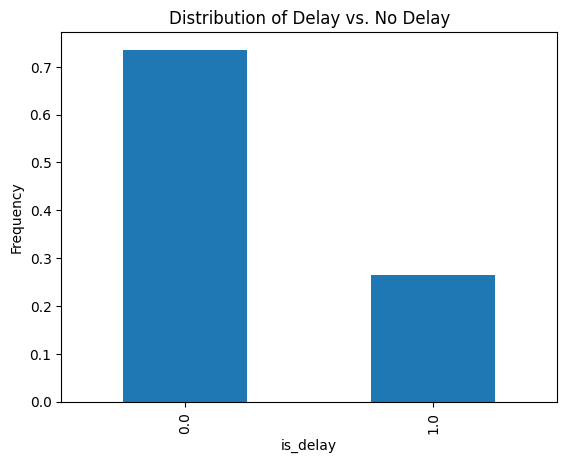

In [ ]:
import matplotlib.pyplot as plt

# Group by 'is_delay' and calculate the frequency of each class
(data.groupby('is_delay').size() / len(data)).plot(kind='bar')

# Set the labels and title
plt.ylabel('Frequency')
plt.title('Distribution of Delay vs. No Delay')

# Show the plot
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

Answer-
From the bar plot, we can deduce that the ratio of flights with no delay (indicated by is_delay = 0) is significantly higher than those that are delayed (indicated by is_delay = 1). The plot shows that over 70% of the flights in the dataset are not delayed, while less than 30% experience a delay.

This suggests that the majority of flights arrive on time, and only a smaller proportion suffer from delays of more than 15 minutes. The imbalance in the dataset could also imply that predicting delays might require focusing on specific factors that contribute to delays, as they are less frequent.

**Questions**:

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

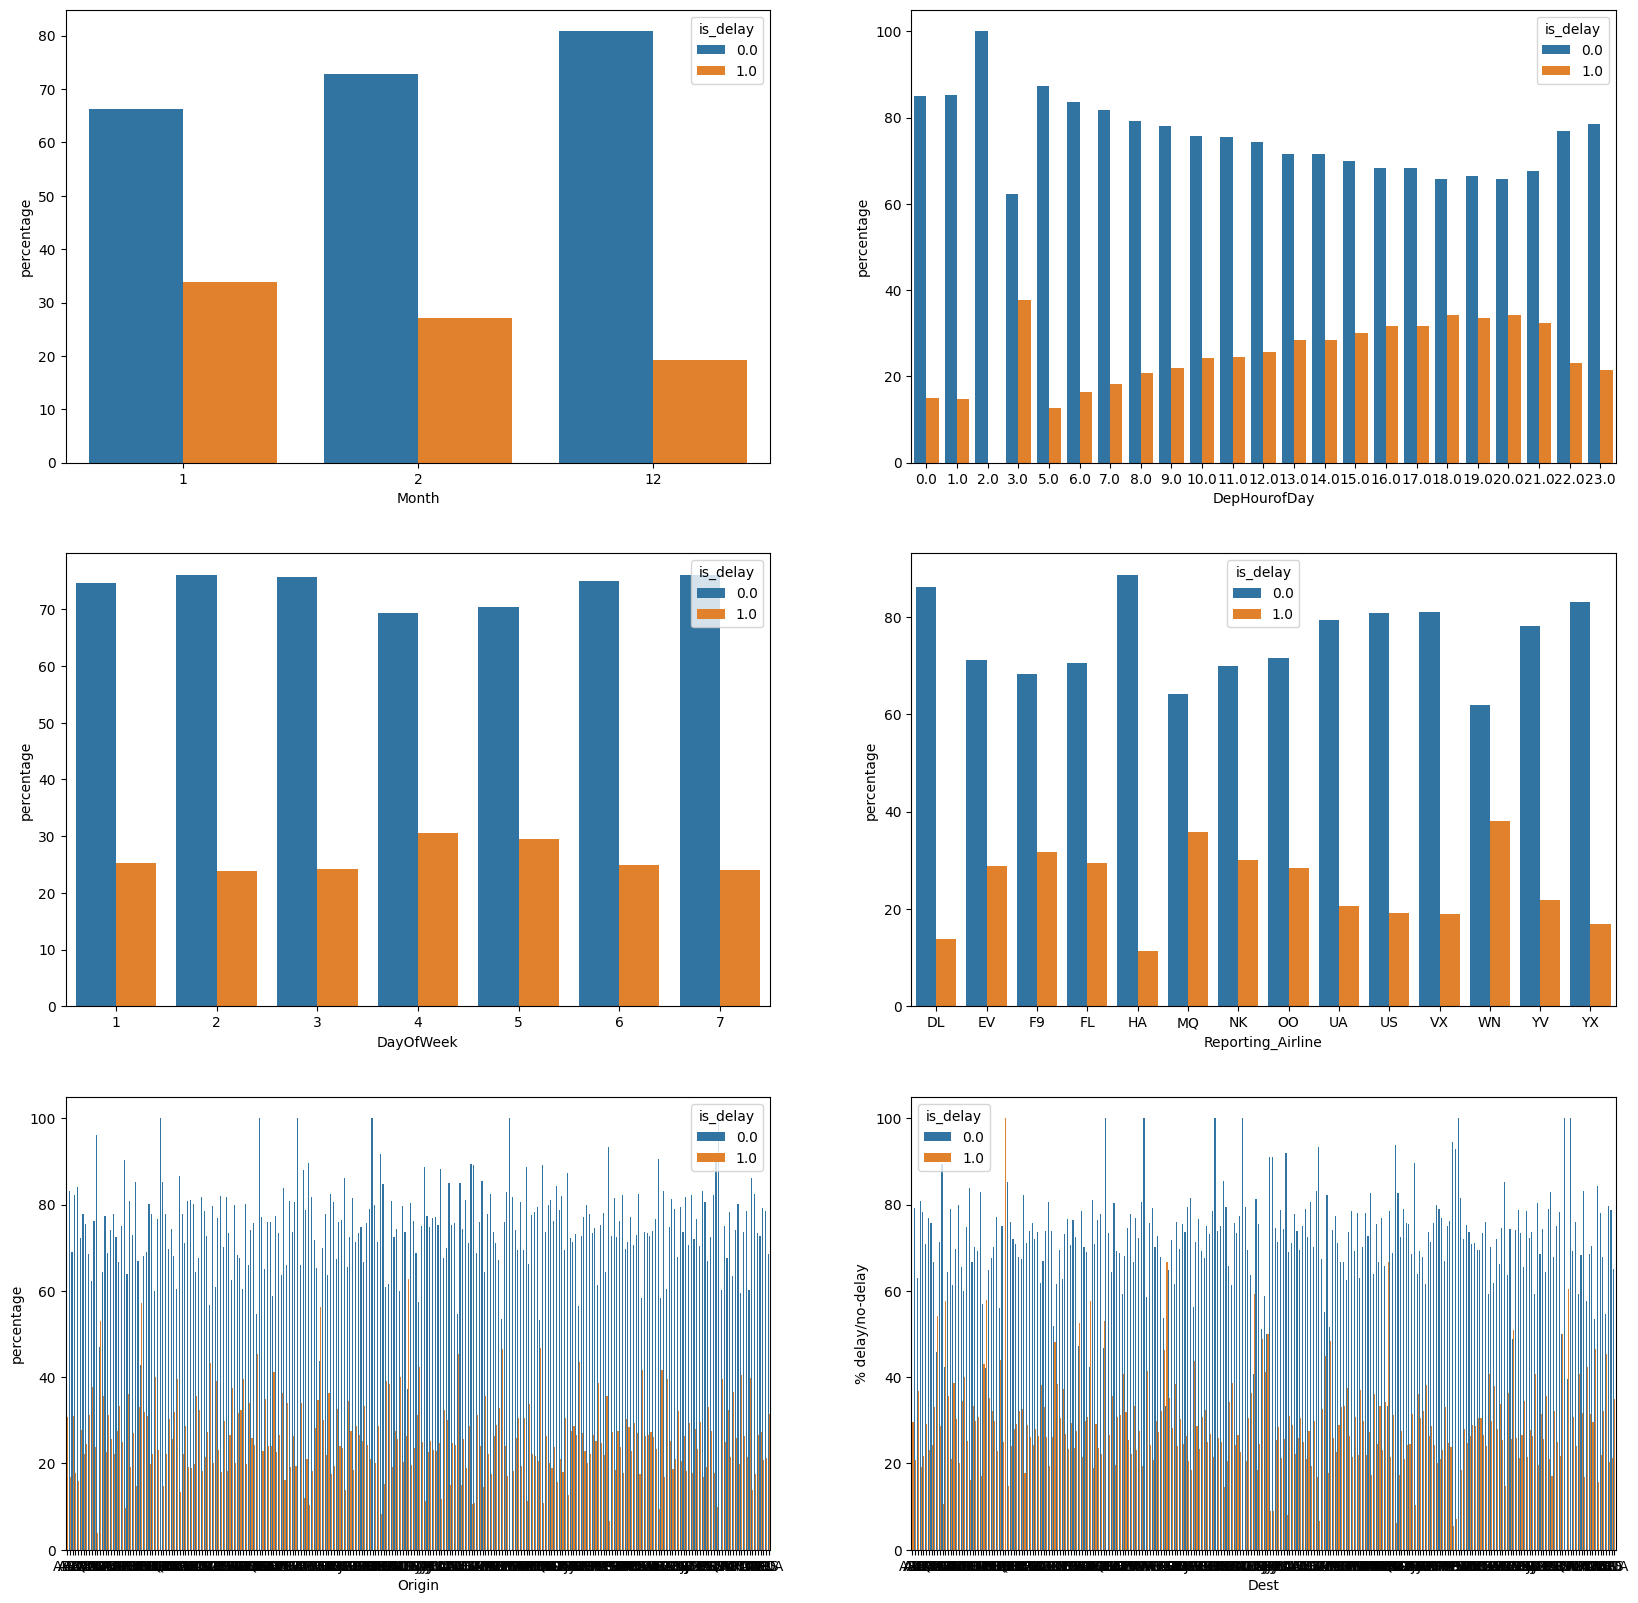

In [ ]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')


plt.show()

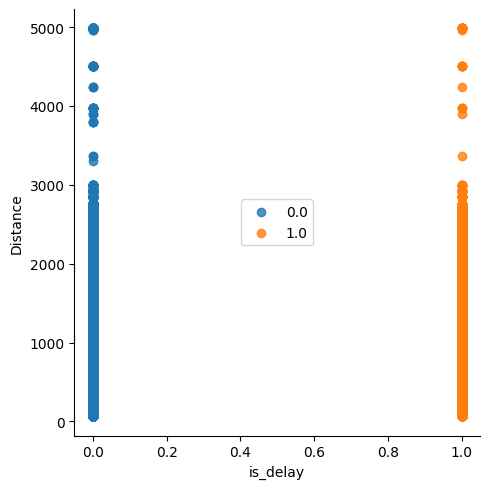

In [ ]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

1. To identify which month have the most delays we have plotted some graph. the below first graph shows that in the month of January most of the flights were delayed

2.  At 2 to 3 AM most of the flights delays.

3. Most of the Flight delays in the forth week of the months.

4. From the below graph it is clear that WN airlines has the more number of counts of flight delays.

5. flight Distance is also a factor that is affecting the delays of flights it is clear from the below graph.  

### Features

Look at all the columns and what their specific types are.

In [ ]:
data

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,DepHourofDay
0,2014,1,1,1,3,01-01-14,EV,20366,EV,N14186,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,2014,1,1,3,5,03-01-14,EV,20366,EV,N13988,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
2,2014,1,1,7,2,07-01-14,EV,20366,EV,N13997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
3,2014,1,1,12,7,12-01-14,EV,20366,EV,N12967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
4,2014,1,1,9,4,09-01-14,EV,20366,EV,N12552,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038275,2018,4,12,1,6,01-12-18,WN,19393,WN,N924WN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14
1038276,2018,4,12,1,6,01-12-18,WN,19393,WN,N214WN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
1038277,2018,4,12,1,6,01-12-18,WN,19393,WN,N207WN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1038278,2018,4,12,1,6,01-12-18,WN,19393,WN,N459WN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11


In [ ]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'DOT_ID_Reporting_Airline',
       'IATA_CODE_Reporting_Airline', 'Tail_Number',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'DepHourofDay'],
      dtype='object', length=110)

In [ ]:
data.dtypes

,0
Year,int64
Quarter,int64
Month,int64
DayofMonth,int64
DayOfWeek,int64
...,...
Div5TotalGTime,float64
Div5LongestGTime,float64
Div5WheelsOff,float64
Div5TailNum,float64


Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [ ]:
# Create a copy of the original data
data_orig = data.copy()

# Filter the required columns
data = data_orig[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek','FlightDate',
                   'Reporting_Airline', 'Origin', 'Dest', 'Distance','DepHourofDay']]

# List of columns to convert to categorical type
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek','FlightDate',
                        'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']

# Convert the categorical columns to 'category' data type
for c in categorical_columns:
    data[c] = data[c].astype('category')

# Display the first few rows to confirm changes
data.head()


,is_delay,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,Distance,DepHourofDay
0,0.0,1,1,1,3,01-01-14,EV,IND,EWR,645,10
1,1.0,1,1,3,5,03-01-14,EV,IND,EWR,645,11
2,1.0,1,1,7,2,07-01-14,EV,IND,EWR,645,11
3,0.0,1,1,12,7,12-01-14,EV,IND,EWR,645,10
4,0.0,1,1,9,4,09-01-14,EV,IND,EWR,645,10


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [ ]:
# One-hot encode the categorical columns using pd.get_dummies
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate the original dataset with the new dummy columns
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns from the dataset
data.drop(categorical_columns, axis=1, inplace=True)


Check the length of the dataset and the new columnms.

In [ ]:
# Check the length of the dataset (number of rows)
dataset_length = len(data)

print(f"Dataset length (rows): {dataset_length}")


Dataset length (rows): 1346243


In [ ]:
# List the new columns
new_columns = data.columns

print(f"New columns in the dataset:\n{new_columns}")

New columns in the dataset:
Index(['is_delay', 'Distance', 'Quarter_4', 'Month_2', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6',
       ...
       'DepHourofDay_14', 'DepHourofDay_15', 'DepHourofDay_16',
       'DepHourofDay_17', 'DepHourofDay_18', 'DepHourofDay_19',
       'DepHourofDay_20', 'DepHourofDay_21', 'DepHourofDay_22',
       'DepHourofDay_23'],
      dtype='object', length=882)


**Sample Answer:**
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [ ]:
# Rename 'is_delay' column to 'target'
data.rename(columns = {'is_delay':'target'}, inplace=True)

# Verify the column renaming
print(data.columns)


Index(['target', 'Distance', 'Quarter_4', 'Month_2', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6',
       ...
       'DepHourofDay_14', 'DepHourofDay_15', 'DepHourofDay_16',
       'DepHourofDay_17', 'DepHourofDay_18', 'DepHourofDay_19',
       'DepHourofDay_20', 'DepHourofDay_21', 'DepHourofDay_22',
       'DepHourofDay_23'],
      dtype='object', length=882)


In [ ]:
# Save the combined data to a CSV file
combined_csv_filename = 'combined_csv_v1.csv'  # Specify the file name
data.to_csv(combined_csv_filename, index=False)

In [ ]:
from IPython.display import FileLink

# Create a download link
FileLink('combined_csv_v2.csv')

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the features and target
X = data.drop('target', axis=1)  # Features (independent variables)
y = data['target']  # Target (dependent variable)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Baseline classification model

In [ ]:
# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=10)

# Fit the model on the training data
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10)

In [ ]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7359547241185684
Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85     49805
         1.0       0.00      0.00      0.00     17869

    accuracy                           0.74     67674
   macro avg       0.37      0.50      0.42     67674
weighted avg       0.54      0.74      0.62     67674



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

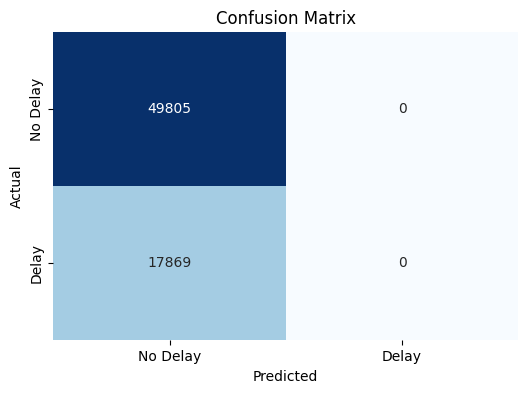

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted ):
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix using seaborn
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Delay', 'Delay'],
                yticklabels=['No Delay', 'Delay'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Example call to plot confusion matrix after logistic regression prediction
plot_confusion_matrix(y_test, y_pred)


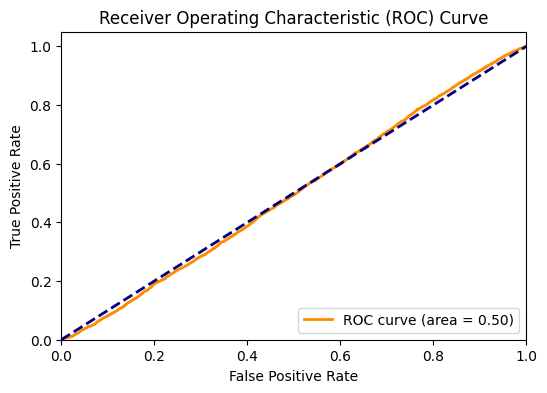

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(y_test, y_pred_proba):
    # Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    # Compute Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Dashed diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming 'log_reg' is your fitted logistic regression model
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1 - delay)

# Example call to plot the ROC curve after logistic regression prediction
plot_roc(y_test, y_pred_proba)

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

ROC AUC: 0.50


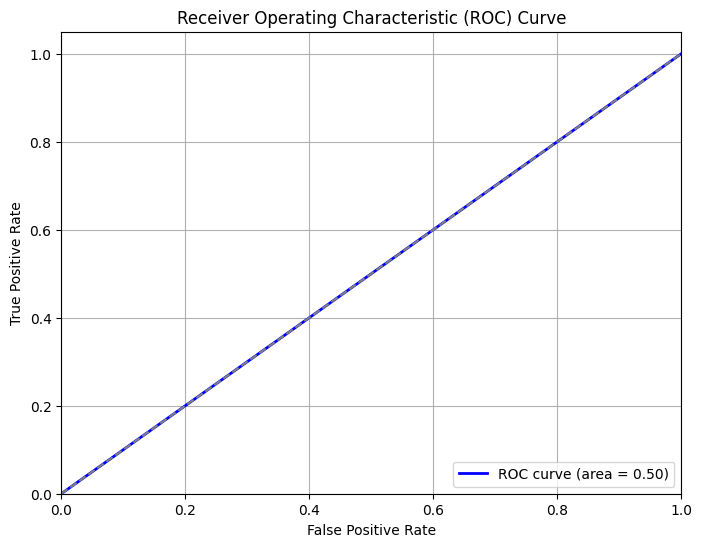

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Assuming test_labels and target_predicted are defined
# test_labels = your true labels
# target_predicted = your predicted probabilities for the positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Print statistics
print(f"ROC AUC: {roc_auc:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


1. Test vs. Training Set Model Performance: A very clear gap is highlighted in the confusion matrix regarding the model's ability to predict the presence of a delay and non-delay. Specifically, it predicts that none of the instances of the test set will experience delays. Given an imbalance in the dataset (i.e., most flights experienced no delay compared to delays), this implies that the model was actually biased toward the expectation of a delay-free situation.

2. Accuracy  is very high, but the class disparity makes it misleading. The model could superficially be very accurate just by guessing "No Delay" as often as possible because the majority of the flights in the dataset are of class "No Delay" class 0. Recall and precision reveal that the model is entirely inept at making forecasts of delay. To further improve class-based prediction for delayed flights, class imbalance needs to be addressed; this can either be achieved through oversampling, undersampling, or using another model with class weighting. But we can say that model gives high accuracy and can predict data with some accuracy.

3. Examine using additional characteristics (such as weather information and holiday times) that might offer a higher prediction ability for delays.
Use dimensionality reduction strategies like Principal Component Analysis (PCA) or experiment with different encodings for categorical variables.

we can apply some more advanced model to get high accuracy like Randomforest model, XgBoost model etc.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [ ]:
### Provide a link for your Gitlab repository here

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance?
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [ ]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ]
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25']
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
#data_orig['is_holiday'] = # Enter your code here

In [ ]:
data_orig.columns

Index(['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay'],
      dtype='object')

In [ ]:
data_orig.columns

Index(['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay'],
      dtype='object')

In [ ]:
# Convert your 'date' column to datetime if it's not already
data_orig['Date'] = pd.to_datetime(data_orig['Date'])


In [ ]:
import pandas as pd

# Combine holiday lists into a single set for easier checking
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18
holidays_set = set(holidays)
# Convert 'FlightDate' to datetime
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Create the is_holiday indicator variable
data_orig['is_holiday'] = data_orig['FlightDate'].dt.strftime('%Y-%m-%d').isin(holidays_set)

<ipython-input-42-acc270e10c42>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])


In [ ]:
data_orig

,is_delay,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,Dest,Distance,DepHourofDay,is_holiday
0,0.0,1,1,1,3,2014-01-01,EV,IND,EWR,645.0,10,True
1,1.0,1,1,3,5,2014-03-01,EV,IND,EWR,645.0,11,False
2,1.0,1,1,7,2,2014-07-01,EV,IND,EWR,645.0,11,False
3,0.0,1,1,12,7,2014-12-01,EV,IND,EWR,645.0,10,False
4,0.0,1,1,9,4,2014-09-01,EV,IND,EWR,645.0,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1038275,0.0,4,12,1,6,2018-01-12,WN,OMA,LAS,1099.0,14,False
1038276,0.0,4,12,1,6,2018-01-12,WN,OMA,MDW,423.0,18,False
1038277,1.0,4,12,1,6,2018-01-12,WN,OMA,MDW,423.0,8,False
1038278,1.0,4,12,1,6,2018-01-12,WN,OMA,MDW,423.0,11,False


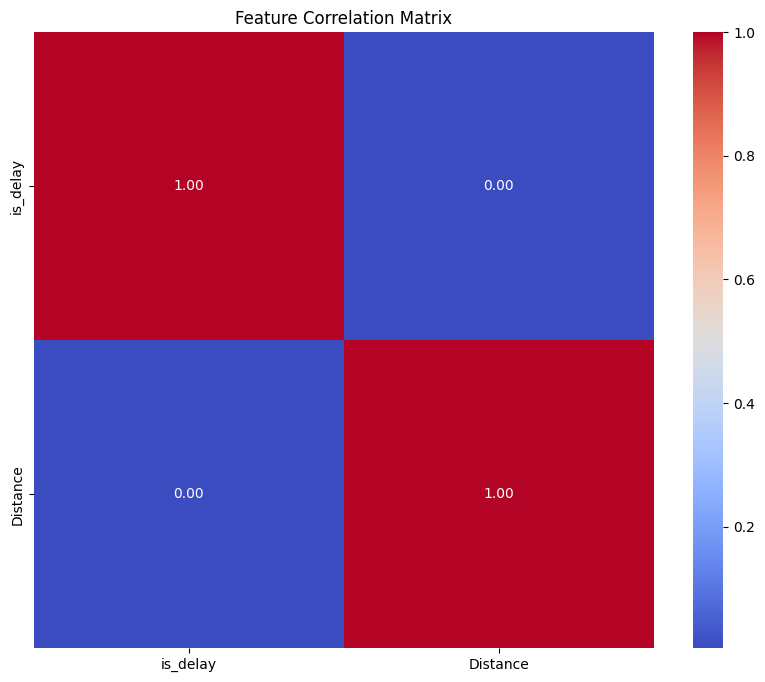

In [ ]:
# Convert 'Date' column to datetime if it's not already
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Create the is_holiday indicator variable
data_orig['is_holiday'] = data_orig['FlightDate'].dt.strftime('%Y-%m-%d').isin(holidays_set)

# Select only numeric columns for correlation calculation
numeric_data = data_orig.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Visualize the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Rename 'is_delay' column to 'target'
data.rename(columns = {'is_delay':'target'}, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define your features and target
# Explicitly drop the 'Date' column in addition to the target column
X = data_orig.drop(columns=['target', 'Date', 'FlightDate'])  # Dropping both target and Date columns
y = data_orig['target']

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through all columns in X and encode any that are of type 'object'
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = le.fit_transform(X[column])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     49805
         1.0       1.00      1.00      1.00     17869

    accuracy                           1.00     67674
   macro avg       1.00      1.00      1.00     67674
weighted avg       1.00      1.00      1.00     67674

Accuracy: 1.00


Adding new feature is become beneficial by applying random forest in tis new dataset we got high accuracy. The Random Forest model we were using achieved 100% precision, recall, and f1-score for both classes, no delay = 0.0, and delay = 1.0. Sounds like a perfect result, but is very often the sign of a potential problem. Note the following points:

1. Explanation of Performance Metrics
Of all instances that were anticipated being positive, precision measures the percentage of actual positive instances identified (delayed flights). All flights that were predicted would be delayed indeed were so as had been indicated by the results obtained as shown by a precision of 1.00.
From all actual positive instances remember that recall, the proportion of correct-positive instance identifiable. There was a model that correctly identified every late flight had a recall of 1.00.

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [ ]:
weather = pd.read_csv('daily-summaries-2024-10-20T02-59-57.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881']
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = {
    'USW00023174': 'LAX',
    'USW00012960': 'IAH',
    'USW00003017': 'DEN',
    'USW00094846': 'ORD',
    'USW00013874': 'ATL',
    'USW00023234': 'SFO',
    'USW00003927': 'DFW',
    'USW00023183': 'PHX',
    'USW00013881': 'CLT'
}

# Step 3: Map weather stations to airport codes
weather['airport'] = weather['STATION'].map(station_map)

# Display the updated DataFrame
print(weather.head())

       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport  
0     LAX  
1     LAX  
2     LAX  
3     LAX  
4     LAX  


Create another column called `MONTH` from the `DATE` column.

In [ ]:
# Assuming the date column is named 'date'
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])

# Display the updated DataFrame
print(weather.head())


       STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01  


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [ ]:
# Fill missing values in the SNOW column with the mean
weather.SNOW.fillna(weather.SNOW.mean(), inplace=True)

# Fill missing values in the SNWD column with the mean
weather.SNWD.fillna(weather.SNWD.mean(), inplace=True)

# Alternatively, use median:
# weather.SNOW.fillna(weather.SNOW.median(), inplace=True)
# weather.SNWD.fillna(weather.SNWD.median(), inplace=True)

# Check for any remaining missing values
print(weather.isna().sum())


STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64


<ipython-input-46-52f43b29a30c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather.SNOW.fillna(weather.SNOW.mean(), inplace=True)
<ipython-input-46-52f43b29a30c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [ ]:
import numpy as np

# Generate an array of indices for the DataFrame
idx = np.array([i for i in range(len(weather))])

# Get indices of rows with missing values for TAVG
TAVG_idx = idx[weather['TAVG'].isna()]

# Get indices of rows with missing values for TMAX
TMAX_idx = idx[weather['TMAX'].isna()]

# Get indices of rows with missing values for TMIN
TMIN_idx = idx[weather['TMIN'].isna()]

# Print the indices
print("Indices with missing values for TAVG:", TAVG_idx)
print("Indices with missing values for TMAX:", TMAX_idx)
print("Indices with missing values for TMIN:", TMIN_idx)


Indices with missing values for TAVG: [ 3956  3957  3958  3959  3960  3961  3962  3963  3964  3965  3966  3967
  3968  3969  3970  3971  3972  3973  3974  3975  3976  3977  3978  3979
  3980  3981  3982  3983  3984  3985  4017  4018  4019  4020  4021  4022
  4023  4024  4025  4026  4027  4028  4029  4030  4031  4032  4033  4034
  4035  4036  4037  4038  4039  4040  4041  4042  4043  4044  4045  4046
  4047 13420]
Indices with missing values for TMAX: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]
Indices with missing values for TMIN: [10763 10764 10765 10766 10767 10768 10769 10770 10771 10772 10773 10774
 10775 10776 10777 10778 10779 10780 10781 10782]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [ ]:
# Assuming the DataFrame has a column that identifies the station or airport
# For example, if the column is named 'airport', you can group by this column

# Step 1: Group by 'airport' and calculate the mean for TAVG, TMAX, and TMIN
weather_impute = weather.groupby('airport').agg({
    'TAVG': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
}).reset_index()

# Step 2: Merge the imputed values back to the original DataFrame
# This will create a new DataFrame with the mean values corresponding to each airport
weather = weather.merge(weather_impute, on='airport', suffixes=('', '_mean'))

# Step 3: Fill missing values in the original columns with the mean values
weather['TAVG'].fillna(weather['TAVG_mean'], inplace=True)
weather['TMAX'].fillna(weather['TMAX_mean'], inplace=True)
weather['TMIN'].fillna(weather['TMIN_mean'], inplace=True)

# Optionally, drop the mean columns if they are no longer needed
weather.drop(columns=['TAVG_mean', 'TMAX_mean', 'TMIN_mean'], inplace=True)

# Display the updated DataFrame
print(weather.head(2))


       STATION        DATE  AWND  PRCP      SNOW      SNWD   TAVG   TMAX  \
0  USW00023174  2014-01-01    16     0  1.122855  3.487222  131.0  178.0   
1  USW00023174  2014-01-02    22     0  1.122855  3.487222  159.0  256.0   

    TMIN airport MONTH  
0   78.0     LAX    01  
1  100.0     LAX    01  


<ipython-input-48-41118cbadca3>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weather['TAVG'].fillna(weather['TAVG_mean'], inplace=True)
<ipython-input-48-41118cbadca3>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Merge the mean data with the weather data.

In [ ]:
# Assuming 'Month' and 'STATION' are present in the original weather DataFrame

# Step 1: Group by 'Month' and 'STATION' and calculate the mean for TAVG, TMAX, and TMIN
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({
    'TAVG': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean'
}).reset_index()

# Step 2: Merge the imputed values back to the original DataFrame
weather = pd.merge(weather, weather_impute, how='left', on=['MONTH', 'STATION'], suffixes=('', '_AVG'))

# Step 3: Rename columns for clarity
weather = weather.rename(columns={
    'TAVG_AVG': 'TAVG_AVG',
    'TMAX_AVG': 'TMAX_AVG',
    'TMIN_AVG': 'TMIN_AVG',
    'TAVG': 'TAVG',
    'TMAX': 'TMAX',
    'TMIN': 'TMIN'
})

# Display the updated DataFrame
print(weather.head(2))

       STATION        DATE  AWND  PRCP      SNOW      SNWD   TAVG   TMAX  \
0  USW00023174  2014-01-01    16     0  1.122855  3.487222  131.0  178.0   
1  USW00023174  2014-01-02    22     0  1.122855  3.487222  159.0  256.0   

    TMIN airport MONTH    TAVG_AVG    TMAX_AVG    TMIN_AVG  
0   78.0     LAX    01  148.619355  198.154839  103.477419  
1  100.0     LAX    01  148.619355  198.154839  103.477419  


Check for missing values again.

In [ ]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

<ipython-input-50-cc1adcc3488a>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
<ipython-input-50-cc1adcc3488a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,0
STATION,0
DATE,0
AWND,0
PRCP,0
SNOW,0
SNWD,0
TAVG,0
TMAX,0
TMIN,0
airport,0


Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [ ]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [ ]:
data_orig= data

In [ ]:
data_orig.c

In [ ]:
if 'FlightDate' in data_orig.columns:
    print("Column 'FlightDate' is present in the DataFrame.")
else:
    print("Column 'FlightDate' is not present in the DataFrame.")

Column 'FlightDate' is not present in the DataFrame.


In [ ]:
### Add origin weather conditions
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate']).dt.date  # Convert 'FlightDate' to date
weather['DATE'] = pd.to_datetime(weather['DATE']).dt.date  # Convert 'DATE' to date

In [ ]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [ ]:
sum(data.isna().any())

0

In [ ]:
data_orig.columns

Index(['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'Dest', 'Distance', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [ ]:
data = data_orig.copy()
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'Dest','Distance','is_holiday', 'DepHourofDay','AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [ ]:
# Create dummy variables for the categorical columns
data_dummies = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the new DataFrame with dummy variables
print(data_dummies.head())

   is_delay  FlightDate  Distance DepHourofDay  AWND_O  PRCP_O  TAVG_O  \
0       0.0  2014-01-01       645           10     NaN     NaN     NaN   
1       1.0  2014-03-01       645           11     NaN     NaN     NaN   
2       1.0  2014-07-01       645           11     NaN     NaN     NaN   
3       0.0  2014-12-01       645           10     NaN     NaN     NaN   
4       0.0  2014-09-01       645           10     NaN     NaN     NaN   

   AWND_D  PRCP_D  TAVG_D  ...  Dest_USA  Dest_UST  Dest_VEL  Dest_VLD  \
0     NaN     NaN     NaN  ...     False     False     False     False   
1     NaN     NaN     NaN  ...     False     False     False     False   
2     NaN     NaN     NaN  ...     False     False     False     False   
3     NaN     NaN     NaN  ...     False     False     False     False   
4     NaN     NaN     NaN  ...     False     False     False     False   

   Dest_VPS  Dest_WRG  Dest_XNA  Dest_YAK  Dest_YUM  is_holiday_True  
0     False     False     False     Fal

In [ ]:
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']

In [ ]:
data_dummies = pd.get_dummies(data[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_holiday')
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [ ]:
data.columns

Index(['is_delay', 'FlightDate', 'Distance', 'is_holiday', 'DepHourofDay',
       'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D',
       ...
       'Dest_USA', 'Dest_UST', 'Dest_VEL', 'Dest_VLD', 'Dest_VPS', 'Dest_WRG',
       'Dest_XNA', 'Dest_YAK', 'Dest_YUM', 'is_holiday_True'],
      dtype='object', length=782)

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [ ]:
data.rename(columns = {'is_delay': 'target'}, inplace=True )# Enter your code here

In [ ]:
# Assuming 'data' is your combined DataFrame
data.to_csv('combined_csv_v2.csv', index=False)

In [ ]:
from IPython.display import FileLink

# Create a download link
FileLink('combined_csv_v2.csv')

Create the training and testing sets again.

In [ ]:
import pandas as pd
data = pd.read_csv('/Users/sebastianjoseph/Desktop/combined_csv_v2.csv')

In [ ]:
data

,target,FlightDate,Distance,is_holiday,DepHourofDay,AWND_O,AWND_O.1,PRCP_O,PRCP_O.1,TAVG_O,...,Dest_USA,Dest_UST,Dest_VEL,Dest_VLD,Dest_VPS,Dest_WRG,Dest_XNA,Dest_YAK,Dest_YUM,is_holiday_True
0,0.0,2014-01-01,645.0,True,10,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
1,1.0,2014-03-01,645.0,False,11,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,1.0,2014-07-01,645.0,False,11,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,0.0,2014-12-01,645.0,False,10,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,0.0,2014-09-01,645.0,True,10,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79162,0.0,2014-01-26,1303.0,False,9,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
79163,0.0,2014-01-26,325.0,False,6,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
79164,0.0,2014-01-26,1303.0,False,12,NaN,39.0,NaN,0.0,NaN,...,False,False,False,False,False,False,False,False,False,False
79165,0.0,2014-01-26,1927.0,False,18,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame and 'target' is the column to predict
X = data.drop(['target', 'FlightDate'], axis=1)  # Features
y = data['target']                 # Target variable

# Create training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (63333, 779), Testing set shape: (15834, 779)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [ ]:
# Initialize the imputer to replace NaN with the mean of the column
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Initialize the logistic regression model
classifier_2 = LogisticRegression(max_iter=10)

# Fit the model on the training data
classifier_2.fit(X_train, y_train)  # Make predictions on the test data

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['AWND_O' 'PRCP_O' 'TAVG_O' 'SNOW_O']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:598: UserWarning: Skipping features without any observed values: ['AWND_O' 'PRCP_O' 'TAVG_O' 'SNOW_O']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=10)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report

y_pred = classifier_2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.706959706959707
Classification Report:
              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     11207
         1.0       0.37      0.00      0.01      4627

    accuracy                           0.71     15834
   macro avg       0.54      0.50      0.42     15834
weighted avg       0.61      0.71      0.59     15834



Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

By adding new features like weather and airports again i have applied the logistic regression model by this model we achieved 71% of accuracy which is lower than previous  random forest model and also lower that first logitic regression model that is applied without adding new features. So we can say tha This model does not give high accuracy as compare to other two models.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem.
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [ ]:
https://public.tableau.com/views/FlightDelay_17301079255360/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Link to my Tableau public dashboard

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. I have applied logistic regression model and Randomforest model. First I have applied logistic regression model using without new features data in this model we recieved 75% of accuracy. After that ading new features like holdiday i have again applied random forest model in which we got the highest accuracy which is 99%. then again adding new features like weather, airport station etc. we recieved 73% of accuracy by logistic regression model. From this predictive analysis we can say that Randomforest model performance meets business goals because all this gives hieghst accuracy. But the rest two model needs improvement. For improvment we can apply hyperparameter tunning remove overfitting of the model and applying feature engineering we can also apply advaced machine learning models like Random forest, XGboost model.

2. Modifications like the addition of holiday indications and weather data throughout the project greatly enhanced forecasts. The dataset was improved with each iteration, improving our comprehension of key characteristics.
To improve the model performance  i have applied feature engineering method. after applying this method and applying Randomforest model we recieved higher accuracy that is 99% of accuracy from this we can say that this model is the best fit model to predict the data.


3. Data Quality: Missing value management, and maintaining data quality became constant challenges requiring frequent deliberations about the most efficient way to delete or impute missing data.
Feature selection: It would have been challenging to identify which of the characteristics were most indicative of the causes of flight delays because there are too many causes of flight delays and thus it is difficult to understand how these different factors interrelate.
Model Evaluation It needed constant introspection and modification to understand the output from interpretation what the performance metrics meant and how they impacted the business context.


4. Importance of Data Quality: The quality of the input data itself is going to be reflected in the quality of the model produced. Therefore, proper preprocessing, handling missing values, and feature relevance analysis need to be performed.
Feature Engineering: Relevant features can be fashioned from the attribute set so that the performance of the model improves. Techniques include constructing interaction terms or using domain knowledge to create new features to realize better results.
Iterative Process: All of machine learning is an iterative process. The models have to be fine-tuned and enhanced over time with ongoing experimentation with the model parameters, feature selection, and evaluation methods.